# Muestreo Natural
Asumiendo el caso del muestreo natural, sabemos que el resultado del proceso de muestreo conlleva a un espectro donde la repetición del contenido en frecuencia de la señal de entrada se produce de forma proporcional a la original, atenúandose.
El espectro en frecuencia de la señal muestreada en el continuo, se puede describir de la siguiente forma:

\begin{equation}
    X_i(f) = \frac{\tau}{T_s} \cdot \sum_{n \in Z} sinc(n \cdot f_s \cdot \tau) \cdot X(f - n \cdot f_s)
\end{equation}

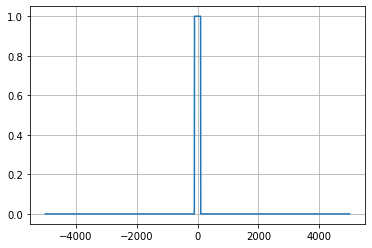

In [26]:
from numpy import sinc, arange, ndarray
from scipy import optimize
from matplotlib import pyplot
from random import random

def X(f, f_b):
    """
    Simulación del espectro de una función sinc(...), ergo, X(f) es un pulso de ancho 2 * f_b
    :param f: Frecuencia donde la función es evaluada
    :param f_b: Ancho del pulso de la función
    :return: Resultado de la función
    """
    if type(f) is list or type(f) is ndarray:
        return [1 if abs(f_value) <= f_b else 0 for f_value in f]
    else:
        return 1 if abs(f) <= f_b else 0

# Definición de los parámetros del espectro de entrada y su función
f_min = -5000
f_max = 5000
f_samples = 2000
f_b = 100
frequency = arange(f_min, f_max, (f_max - f_min) / f_samples)
x_values = X(frequency, f_b)

# Ploteando el espectro de la señal de entrada
pyplot.plot(frequency, x_values)
pyplot.grid()
pyplot.show()


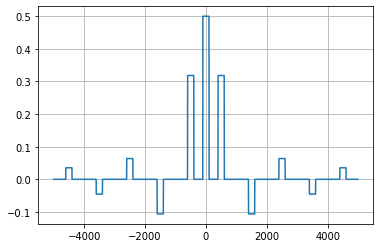

In [27]:
def Xi(*args):
    """
    Simula el espectro de la salida del muestreo natural.
    :param f: Variable a evaluar
    :param f_s: Frecuencia de muestreo
    :param tau: Ancho de los pulsos de muestreo
    :param x: Función del espectro de entrada
    :return: Resultado de la función
    """
    def Xi_one(f, f_s, tau, x):
        n_min = -20
        n_max = 20
        summ = 0
        for n in range(n_min, n_max + 1):
            summ += sinc(n * f_s * tau) * x(f - n * f_s)
        return summ * tau * f_s
    
    if type(args[0]) is list or type(args[0]) is ndarray:
        return [Xi_one(f_value, args[1], args[2], args[3]) for f_value in args[0]]
    else:
        return Xi_one(*args)

# Ploteando el espectro de la señal muestreada
f_s = 500
tau = 1 / f_s / 2
xi_values = Xi(frequency, f_s, tau, lambda f: X(f, f_b))

pyplot.plot(frequency, xi_values)
pyplot.grid()
pyplot.show()

# Muestreo Instantáneo
Reemplazamos el proceso de muestreo, en vez de usar pulsos, utilizamos tren de deltas y un retardo temporal para retener el valor muestreado durante una duración dada. El espectro resultante está dado por la expresión:

\begin{equation}
    F_o(f) = \frac{\tau}{T_s} \cdot \sum_{n \in Z} sinc(\tau \cdot f) \cdot X(f - n \cdot f_s)
\end{equation}

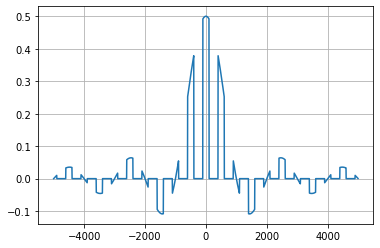

In [28]:
def Xo(*args):
    """
    Simula el espectro de la salida del muestreo natural.
    :param f: Variable a evaluar
    :param f_s: Frecuencia de muestreo
    :param tau: Ancho de los pulsos de muestreo
    :param x: Función del espectro de entrada
    :return: Resultado de la función
    """
    def Xo_one(f, f_s, tau, x):
        n_min = -20
        n_max = 20
        summ = 0
        for n in range(n_min, n_max + 1):
            summ += sinc(f * tau) * x(f - n * f_s)
        return summ * tau * f_s
    
    if type(args[0]) is list or type(args[0]) is ndarray:
        return [Xo_one(f_value, args[1], args[2], args[3]) for f_value in args[0]]
    else:
        return Xo_one(*args)

# Ploteando el espectro de la señal muestreada
xo_values = Xo(frequency, f_s, tau, lambda f: X(f, f_b))

pyplot.plot(frequency, xo_values)
pyplot.grid()
pyplot.show()